In [2]:
import pandas 
import numpy 
import os
import os.path 

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import classification_report

from sklearn.metrics import brier_score_loss 
from sklearn.metrics import auc 

### HREF Reading 

Reading all years and put them in one csv file 

In [2]:
names = ['href-vis-2018.csv', 'href-vis-2019.csv', 'href-vis-2020.csv'] 
path = './HREF/'
name = path + names[0]

df_2018 = pandas.read_csv(path + names[0], header = 0)
df_2019 = pandas.read_csv(path + names[1], header = 0)
df_2020 = pandas.read_csv(path + names[2], header = 0)
HREF = pandas.concat([df_2018, df_2019, df_2020]) 
HREF['1600'] = HREF['1600'].div(100)
HREF['3200'] = HREF['3200'].div(100)
HREF['6400'] = HREF['6400'].div(100)

In [ ]:
HREF.to_csv('HREF.csv')

### Extract the lead time form main HREF file: 

In [14]:
def href_target_selection(csv_file_name, lead_times):
    HREF = pandas.DataFrame(columns = 
                            ['MCT', 'MPT','MC','FH', '1600', '3200', '6400']) 
    HREF_Prob = pandas.DataFrame(columns = 
                                 ['MCT', 'MPT','MC','FH', 'P0_1600','P1_1600', 'P0_3200', 'P1_3200', 'P0_6400', 'P1_6400'])
    path = './HREF/'
    name = path + csv_file_name  
    H = pandas.read_csv(name, header = 0)
    L = H.shape[0]

    for i in range(L): 
        #MC = HREF.iloc[index, 2] 
        FH = H.iloc[i, 3]

        if (FH == lead_times): 
            HREF = HREF.append(H.iloc[i, :])
            

    HREF_Prob ['MCT']     = HREF ['MCT']
    HREF_Prob ['MPT']     = HREF ['MPT']
    HREF_Prob ['MC']      = HREF ['MC']
    HREF_Prob ['FH']      = HREF ['FH']
    HREF_Prob ['P0_1600'] = HREF ['1600']
    HREF_Prob ['P1_1600'] = 1 - HREF ['1600'] 
    HREF_Prob ['P0_3200'] = HREF ['3200']
    HREF_Prob ['P1_3200'] = 1 - HREF ['3200'] 
    HREF_Prob ['P0_6400'] = HREF ['6400']
    HREF_Prob ['P1_6400'] = 1- HREF ['6400']
    return HREF, HREF_Prob 
    

In [18]:
HREF24, HREF24_Prob = href_target_selection('HREF.csv', 24) 

In [19]:
HREF24_Prob.to_csv('HREF24_Prob.csv')

### CNN

In [2]:
names = ['CNN_Prob_012.csv'] 
path = './'
name = path + names[0]

Prob012 = pandas.read_csv(path + names[0], header = 0)
Prob012

,Date,VIS,VIS_Cat,C0_P0,C0_P1,C1_P0,C1_P1,C2_P0,C2_P1,C3_P0,C3_P1
0,20180530,10.0,4,3.700000e-11,1.000000,1.260000e-05,0.999987,3.650000e-07,1.000000,1.150000e-07,1.000000
1,20180530,10.0,4,1.800000e-12,1.000000,1.040000e-05,0.999990,1.670030e-04,0.999833,3.548682e-03,0.996451
2,20180530,10.0,4,8.220000e-19,1.000000,9.090000e-14,1.000000,4.050000e-07,1.000000,4.900000e-06,0.999995
3,20180530,10.0,4,9.670000e-12,1.000000,1.200000e-07,1.000000,1.189696e-03,0.998810,7.002080e-04,0.999300
4,20180531,10.0,4,4.290000e-12,1.000000,3.670000e-07,1.000000,1.450000e-05,0.999985,2.870000e-06,0.999997
...,...,...,...,...,...,...,...,...,...,...,...
1143,20190715,10.0,4,3.810000e-10,1.000000,1.050000e-15,1.000000,6.009410e-04,0.999399,4.540000e-06,0.999995
1144,20190717,10.0,4,2.550000e-06,0.999997,2.200000e-05,0.999978,1.090750e-04,0.999891,2.626660e-04,0.999737
1145,20190717,7.0,4,1.670000e-08,1.000000,2.030000e-09,1.000000,9.987930e-04,0.999001,3.949562e-02,0.960504
1146,20190717,10.0,4,5.630000e-16,1.000000,8.290000e-23,1.000000,4.030000e-07,1.000000,1.130000e-07,1.000000


In [11]:
i = 0 
raws = [] 
while i < length:  
    raw = i+1
    #print(raw)
    raws.append(raw)
    
    i = i + 2
    #print(raw)

In [13]:
len(raws)

574

In [16]:
drop_raws = Prob012.index[raws]

Prob012.drop(drop_raws, inplace=True)

In [18]:
Prob012.to_csv('CNN_Prob_012_M.csv')

In [3]:
names = ['A.csv'] 
path = './'
name = path + names[0]

Data = pandas.read_csv(path + names[0], header = 0)
Data

,Date,T_1600,T_3200,T_6400,H6_P0_1600,H6_P1_1600,H6_P0_3200,H6_P1_3200,H6_P0_6400,H6_P1_6400,...,H12_P0_3200,H12_P1_3200,H12_P0_6400,H12_P1_6400,H24_P0_1600,H24_P1_1600,H24_P0_3200,H24_P1_3200,H24_P0_6400,H24_P1_6400
0,20180530,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,20180530,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,20180531,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,20180531,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,20180601,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,20200527,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1647,20200529,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1648,20200529,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1649,20200529,1,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [4]:
NumpyData = Data.to_numpy()
HREF6_1600 = NumpyData[:, 4:6]
HREF6_3200 = NumpyData[:, 6:8]
HREF6_6400 = NumpyData[:, 8:10]

HREF12_1600 = NumpyData[:, 10:12]
HREF12_3200 = NumpyData[:, 12:14]
HREF12_6400 = NumpyData[:, 14:16]

HREF24_1600 = NumpyData[:, 16:18]
HREF24_3200 = NumpyData[:, 18:20]
HREF24_6400 = NumpyData[:, 20:22]
##CNN_1600 = NumpyData[:, 7:9]
#CNN_3200 = NumpyData[:, 9:11]
#CNN_6400 = NumpyData[:, 11:13]
#CNN_9600 = NumpyData[:, 13:15]

T_1600 = NumpyData[:, 1]
T_3200 = NumpyData[:, 2]
T_6400 = NumpyData[:, 3]


In [6]:
def Optimal_Thr(y, ypred): 
    length = len(ypred) 
    ypred_ = [0]*length
    results = numpy.empty(shape = (1000, 8), dtype='float')
    th_list = numpy.arange(0, 1, 0.001).tolist()
    for j in range(1000):
        th = th_list[j]
        for i in range(length):
            prob = ypred[i, 1] 
            if prob > th:
                ypred_[i] = 1
            else:
                ypred_[i] = 0
        ypred_ = numpy.array(ypred_)
        tn, fp, fn, tp = confusion_matrix(y, ypred_).ravel()
        a = tn     # Hit
        b = fn      # false alarm
        c = fp      # miss
        d = tp    # correct rejection 

        POD = a/(a+c)
        results[j, 0] = POD

        F   = b/(b+d)
        results[j, 1] = F

        FAR  = b/(a+b)
        results[j,2] = FAR

        CSI = a/(a+b+c)
        results[j, 3] = CSI

        PSS = ((a*d)-(b*c))/((b+d)*(a+c))
        results[j, 4] = PSS

        HSS = (2*((a*d)-(b*c)))/(((a+c)*(c+d))+((a+b)*(b+d)))
        results[j, 5] = HSS

        ORSS = ((a*d)-(b*c))/((a*d)+(b*c))
        results[j, 6] = ORSS

        CSS = ((a*d)-(b*c))/((a+b)*(c+d))
        results[j, 7] = CSS
 
    
    return th_list, results
        


In [7]:
def skilled_metrics(y, ypred, metric): 
    threshold_list, result_list = Optimal_Thr(y, ypred)
    if metric == 'PSS':
        PSS = result_list[:, 4]
        raws = numpy.where(PSS == numpy.amax(PSS))[-1] 
        length_raws = len(raws) 
        if length_raws == 1:
            accuray_list = result_list[raws[0], :] 
            optimal_threshold = threshold_list[raws[0]]
        else:
            accuray_list = result_list[raws[-1], :] 
            optimal_threshold = threshold_list[raws[-1]]

    if metric == 'HSS':
        
        HSS = result_list[:, 5]
        raws = numpy.where(HSS == numpy.amax(HSS))[-1] 
        length_raws = len(raws) 
        if length_raws == 1:
            accuray_list = result_list[raws[0], :] 
            optimal_threshold = threshold_list[raws[0]]
        else:
            accuray_list = result_list[raws[-1], :]
            optimal_threshold = threshold_list[raws[-1]]
    print('The optima threshold is: ', optimal_threshold)
    print('POD  : ', accuray_list[0]) 
    print('F    : ', accuray_list[1])
    print('FAR  : ', accuray_list[2])
    print('CSI  : ', accuray_list[3])
    print('PSS  : ', accuray_list[4])
    print('HSS  : ', accuray_list[5])
    print('ORSS : ', accuray_list[6])
    print('CSS  : ', accuray_list[7])

    return accuray_list, result_list 


In [8]:
accuray_list, result_list = skilled_metrics(T_1600, HREF12_1600, 'HSS')

The optima threshold is:  0.464
POD  :  0.2553191489361702
F    :  0.005610972568578554
FAR  :  0.42857142857142855
CSI  :  0.21428571428571427
PSS  :  0.24970817636759166
HSS  :  0.34136036411772175
ORSS :  0.9676175790285274
CSS  :  0.5499561787905346


In [48]:
result_list

array([[0.0212766 , 0.00124688, 0.66666667, ..., 0.03670929, 0.89138135,
        0.30542071],
       [0.0212766 , 0.00124688, 0.66666667, ..., 0.03670929, 0.89138135,
        0.30542071],
       [0.0212766 , 0.00124688, 0.66666667, ..., 0.03670929, 0.89138135,
        0.30542071],
       ...,
       [0.5106383 , 0.11658354, 0.88625592, ..., 0.14629522, 0.77545746,
        0.09777185],
       [0.5106383 , 0.11658354, 0.88625592, ..., 0.14629522, 0.77545746,
        0.09777185],
       [0.5106383 , 0.11658354, 0.88625592, ..., 0.14629522, 0.77545746,
        0.09777185]])

In [42]:
POD = result_list[:, 0]
FAR = result_list[:, 2]

In [210]:
PSS = results[:, 5]
r = numpy.where(PSS == numpy.amax(PSS)) 
print('the maximum value: ', r) 

the maximum value:  (array([830, 831, 832, 833, 834], dtype=int64),)


In [212]:
results[830, :] 

array([0.6       , 0.05591678, 0.55483871, 0.34328358, 0.54408322,
       0.46866995, 0.92402827, 0.41445368])

In [213]:
th_list[830] 

0.8300000000000001

### Roc Curve: 

In [9]:
def get_points_in_roc_curve(observed_labels, forecast_probabilities):
    """Creates points for ROC curve.

    E = number of examples
    T = number of binarization thresholds

    :param observed_labels: length-E numpy array of class labels (integers in
        0...1).
    :param forecast_probabilities: length-E numpy array with forecast
        probabilities of label = 1.
    :return: pofd_by_threshold: length-T numpy array of POFD (probability of
        false detection) values.
    :return: pod_by_threshold: length-T numpy array of POD (probability of
        detection) values.
    """

    assert numpy.all(numpy.logical_or(
        observed_labels == 0, observed_labels == 1
    ))

    assert numpy.all(numpy.logical_and(
        forecast_probabilities >= 0, forecast_probabilities <= 1
    ))

    observed_labels = observed_labels.astype(int)
    binarization_thresholds = numpy.linspace(0, 1, num=1001, dtype=float)

    num_thresholds = len(binarization_thresholds)
    pofd_by_threshold = numpy.full(num_thresholds, numpy.nan)
    pod_by_threshold = numpy.full(num_thresholds, numpy.nan)

    for k in range(num_thresholds):
        these_forecast_labels = (
            forecast_probabilities >= binarization_thresholds[k]
        ).astype(int)

        this_num_hits = numpy.sum(numpy.logical_and(
            these_forecast_labels == 1, observed_labels == 1
        ))

        this_num_false_alarms = numpy.sum(numpy.logical_and(
            these_forecast_labels == 1, observed_labels == 0
        ))

        this_num_misses = numpy.sum(numpy.logical_and(
            these_forecast_labels == 0, observed_labels == 1
        ))

        this_num_correct_nulls = numpy.sum(numpy.logical_and(
            these_forecast_labels == 0, observed_labels == 0
        ))

        try:
            pofd_by_threshold[k] = (
                float(this_num_false_alarms) /
                (this_num_false_alarms + this_num_correct_nulls)
            )
        except ZeroDivisionError:
            pass

        try:
            pod_by_threshold[k] = (
                float(this_num_hits) / (this_num_hits + this_num_misses)
            )
        except ZeroDivisionError:
            pass

    pod_by_threshold = numpy.array([1.] + pod_by_threshold.tolist() + [0.])
    pofd_by_threshold = numpy.array([1.] + pofd_by_threshold.tolist() + [0.])

    return pofd_by_threshold, pod_by_threshold

In [15]:
pofd_by_threshold, pod_by_threshold = get_points_in_roc_curve(T_1600, HREF12_1600[:, 0])

In [24]:

def _get_pofd_pod_grid(pofd_spacing=0.01, pod_spacing=0.01):
    """Creates grid in POFD-POD space.

    M = number of rows (unique POD values) in grid
    N = number of columns (unique POFD values) in grid

    :param pofd_spacing: Spacing between grid cells in adjacent columns.
    :param pod_spacing: Spacing between grid cells in adjacent rows.
    :return: pofd_matrix: M-by-N numpy array of POFD values.
    :return: pod_matrix: M-by-N numpy array of POD values.
    """

    num_pofd_values = 1 + int(numpy.ceil(1. / pofd_spacing))
    num_pod_values = 1 + int(numpy.ceil(1. / pod_spacing))

    unique_pofd_values = numpy.linspace(0., 1., num=num_pofd_values)
    unique_pod_values = numpy.linspace(0., 1., num=num_pod_values)[::-1]
    return numpy.meshgrid(unique_pofd_values, unique_pod_values)


In [27]:
def _get_peirce_colour_scheme():
    """Returns colour scheme for Peirce score.

    :return: colour_map_object: Colour scheme (instance of
        `matplotlib.colors.ListedColormap`).
    :return: colour_norm_object: Instance of `matplotlib.colors.BoundaryNorm`,
        defining the scale of the colour map.
    """

    this_colour_map_object = pyplot.cm.Blues
    this_colour_norm_object = matplotlib.colors.BoundaryNorm(
        LEVELS_FOR_PEIRCE_CONTOURS, this_colour_map_object.N)

    rgba_matrix = this_colour_map_object(this_colour_norm_object(
        LEVELS_FOR_PEIRCE_CONTOURS
    ))

    colour_list = [
        rgba_matrix[i, ..., :-1] for i in range(rgba_matrix.shape[0])
    ]

    colour_map_object = matplotlib.colors.ListedColormap(colour_list)
    colour_map_object.set_under(numpy.array([1, 1, 1]))
    colour_norm_object = matplotlib.colors.BoundaryNorm(
        LEVELS_FOR_PEIRCE_CONTOURS, colour_map_object.N)

    return colour_map_object, colour_norm_object

In [25]:

def plot_roc_curve(
        observed_labels, forecast_probabilities,
        line_colour=DEFAULT_LINE_COLOUR, line_width=DEFAULT_LINE_WIDTH,
        random_line_colour=DEFAULT_RANDOM_LINE_COLOUR,
        random_line_width=DEFAULT_RANDOM_LINE_WIDTH, axes_object=None):
    """Plots ROC curve.

    E = number of examples

    :param observed_labels: length-E numpy array of class labels (integers in
        0...1).
    :param forecast_probabilities: length-E numpy array with forecast
        probabilities of label = 1.
    :param line_colour: Colour (in any format accepted by `matplotlib.colors`).
    :param line_width: Line width (real positive number).
    :param random_line_colour: Colour of reference line (ROC curve for random
        predictor).
    :param random_line_width: Width of reference line (ROC curve for random
        predictor).
    :param axes_object: Will plot on these axes (instance of
        `matplotlib.axes._subplots.AxesSubplot`).  If `axes_object is None`,
        will create new axes.
    :return: pofd_by_threshold: See doc for `get_points_in_roc_curve`.
    :return: pod_by_threshold: Same.
    """

    pofd_by_threshold, pod_by_threshold = get_points_in_roc_curve(
        observed_labels=observed_labels,
        forecast_probabilities=forecast_probabilities)

    if axes_object is None:
        _, axes_object = pyplot.subplots(
            1, 1, figsize=(FIGURE_WIDTH_INCHES, FIGURE_HEIGHT_INCHES)
        )

    pofd_matrix, pod_matrix = _get_pofd_pod_grid()
    peirce_score_matrix = pod_matrix - pofd_matrix

    colour_map_object, colour_norm_object = _get_peirce_colour_scheme()

    pyplot.contourf(
        pofd_matrix, pod_matrix, peirce_score_matrix,
        LEVELS_FOR_PEIRCE_CONTOURS, cmap=colour_map_object,
        norm=colour_norm_object, vmin=0., vmax=1., axes=axes_object)

    # TODO(thunderhoser): Calling private method is a HACK.
    colour_bar_object = performance_diagrams._add_colour_bar(
        axes_object=axes_object, colour_map_object=colour_map_object,
        colour_norm_object=colour_norm_object,
        values_to_colour=peirce_score_matrix, min_colour_value=0.,
        max_colour_value=1., orientation_string='vertical',
        extend_min=False, extend_max=False)

    print(colour_bar_object)
    colour_bar_object.set_label('Peirce score')

    random_x_coords = numpy.array([0., 1.])
    random_y_coords = numpy.array([0., 1.])
    axes_object.plot(
        random_x_coords, random_y_coords, color=random_line_colour,
        linestyle='dashed', linewidth=random_line_width)

    nan_flags = numpy.logical_or(
        numpy.isnan(pofd_by_threshold), numpy.isnan(pod_by_threshold)
    )

    if not numpy.all(nan_flags):
        real_indices = numpy.where(numpy.invert(nan_flags))[0]
        axes_object.plot(
            pofd_by_threshold[real_indices], pod_by_threshold[real_indices],
            color=line_colour, linestyle='solid', linewidth=line_width)

    axes_object.set_xlabel('POFD (probability of false detection)')
    axes_object.set_ylabel('POD (probability of detection)')
    axes_object.set_xlim(0., 1.)
    axes_object.set_ylim(0., 1.)

    return pofd_by_threshold, pod_by_threshold

C:\Users\hkamangir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'axes'


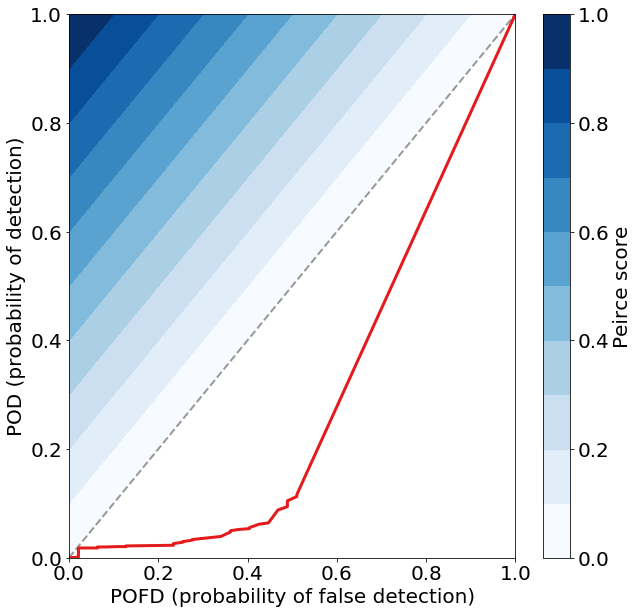

In [45]:
_ = plot_roc_curve(T_1600, HREF12_1600[:, 0],
        line_colour=DEFAULT_LINE_COLOUR, line_width=DEFAULT_LINE_WIDTH,
        random_line_colour=DEFAULT_RANDOM_LINE_COLOUR,
        random_line_width=DEFAULT_RANDOM_LINE_WIDTH, axes_object=None)

In [30]:
import numpy
import matplotlib.colors
import matplotlib.pyplot as pyplot
import performance_diagrams

In [46]:
pod_by_threshold = numpy.array([1.] + POD.tolist() + [0.])
pofd_by_threshold = numpy.array([1.] + FAR.tolist() + [0.])

(0.0, 1.0)

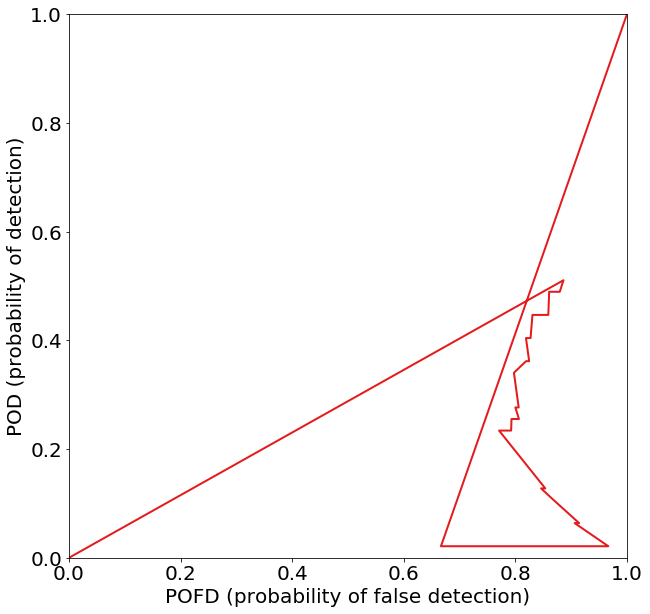

In [47]:
random_x_coords = numpy.array([0., 1.])
random_y_coords = numpy.array([0., 1.])

axes_object = None
if axes_object is None:
    _, axes_object = pyplot.subplots(
        1, 1, figsize=(FIGURE_WIDTH_INCHES, FIGURE_HEIGHT_INCHES)
    )

nan_flags = numpy.logical_or(
    numpy.isnan(pofd_by_threshold), numpy.isnan(pod_by_threshold)
)

if not numpy.all(nan_flags):
    real_indices = numpy.where(numpy.invert(nan_flags))[0]
    axes_object.plot(
        pofd_by_threshold[real_indices], pod_by_threshold[real_indices],
        color=DEFAULT_LINE_COLOUR, linestyle='solid', linewidth=DEFAULT_RANDOM_LINE_WIDTH)

axes_object.set_xlabel('POFD (probability of false detection)')
axes_object.set_ylabel('POD (probability of detection)')
axes_object.set_xlim(0., 1.)
axes_object.set_ylim(0., 1.) 

In [50]:
_ = plot_ROC_Curve(2, T_1600, HREF12_1600) 

IndexError: too many indices for array

<Figure size 720x720 with 0 Axes>

## Reading the Training probs

In [11]:
dir6 = './6HOURS/C38C0/'
file_name = 'VIS_Prob_TRAIN.csv'

Tr6C0 = pandas.read_csv(dir6 + file_name, header = 0) 
Tr6C0Target = pandas.read_csv('./Tr6C0Target.csv', header = None) 

In [12]:
Tr6C0Target  = Tr6C0Target.to_numpy().ravel()
Tr6C0Target.shape

(5460,)

In [13]:
Tr6C0 = Tr6C0.to_numpy()

In [14]:
accuray_list, result_list = skilled_metrics(Tr6C0Target, Tr6C0, 'HSS') 

C:\Users\hkamangir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hkamangir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hkamangir\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in longlong_scalars


The optima threshold is:  0.58
POD  :  0.912621359223301
F    :  0.005040134403584096
FAR  :  0.2231404958677686
CSI  :  0.7230769230769231
PSS  :  0.9075812248197169
HSS  :  0.8359421557547946
ORSS :  0.9990304490856098
CSS  :  0.775173795197974


In [17]:
POD = result_list[:, 0] 
print(POD.shape)
FAR = result_list[:, 2] 
FAR = numpy.nan_to_num(FAR, nan = 1)
print(FAR.shape) 

(1000,)
(1000,)


In [24]:
Roc_Auc = auc(FAR, POD)
_ = ROC_Curve_Plot(FAR, POD, Roc_Auc)

ValueError: x is neither increasing nor decreasing : [1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05882353 0.05555556 0.05555556 0.05263158 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04545455 0.04545455 0.04347826
 0.04347826 0.04347826 0.04166667 0.04166667 0.04166667 0.04
 0.04       0.04       0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.07142857 0.10344828 0.10344828 0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.09677419 0.09677419
 0.09677419 0.09375    0.09375    0.09375    0.09375    0.09375
 0.09090909 0.09090909 0.09090909 0.09090909 0.08823529 0.08823529
 0.08823529 0.08571429 0.08333333 0.07894737 0.07894737 0.07894737
 0.07692308 0.07692308 0.1        0.1        0.12195122 0.12195122
 0.12195122 0.12195122 0.12195122 0.12195122 0.11904762 0.13953488
 0.13953488 0.13953488 0.13953488 0.13953488 0.13636364 0.13333333
 0.13333333 0.13333333 0.13333333 0.13333333 0.13333333 0.13333333
 0.13333333 0.13333333 0.13043478 0.13043478 0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.12244898 0.12244898 0.12244898 0.12       0.12
 0.12       0.12       0.12       0.12       0.12       0.12
 0.12       0.12       0.1372549  0.1372549  0.1372549  0.1372549
 0.1372549  0.1372549  0.13461538 0.13461538 0.13461538 0.13207547
 0.13207547 0.13207547 0.13207547 0.13207547 0.13207547 0.13207547
 0.13207547 0.13207547 0.13207547 0.13207547 0.13207547 0.13207547
 0.12962963 0.12962963 0.12962963 0.12727273 0.125      0.125
 0.125      0.125      0.12280702 0.12280702 0.12068966 0.12068966
 0.12068966 0.12068966 0.12068966 0.12068966 0.12068966 0.12068966
 0.12068966 0.12068966 0.12068966 0.12068966 0.12068966 0.12068966
 0.11864407 0.11864407 0.11864407 0.11864407 0.11864407 0.11864407
 0.11864407 0.11864407 0.11666667 0.11666667 0.11666667 0.11666667
 0.11666667 0.1147541  0.1147541  0.1147541  0.12903226 0.12903226
 0.12903226 0.12903226 0.12698413 0.12698413 0.12698413 0.12698413
 0.12698413 0.12698413 0.12698413 0.12698413 0.12698413 0.12698413
 0.12698413 0.12698413 0.12698413 0.12698413 0.12698413 0.125
 0.125      0.125      0.12307692 0.12307692 0.12307692 0.12307692
 0.12307692 0.12307692 0.12307692 0.13636364 0.13636364 0.14925373
 0.16176471 0.16176471 0.16176471 0.16901408 0.16901408 0.16901408
 0.16901408 0.16901408 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.17808219 0.17567568
 0.18666667 0.18666667 0.18666667 0.18666667 0.18666667 0.18666667
 0.18666667 0.18666667 0.18666667 0.18666667 0.18666667 0.18666667
 0.18666667 0.18666667 0.18666667 0.18421053 0.18421053 0.18421053
 0.18421053 0.18421053 0.18421053 0.18421053 0.18421053 0.17948718
 0.17948718 0.17948718 0.17948718 0.17721519 0.175      0.175
 0.17283951 0.17283951 0.17283951 0.17283951 0.17283951 0.17283951
 0.17283951 0.17283951 0.17073171 0.17073171 0.17073171 0.1686747
 0.1686747  0.1686747  0.1686747  0.1686747  0.1686747  0.1686747
 0.1686747  0.1686747  0.1686747  0.16666667 0.1627907  0.1627907
 0.1627907  0.1627907  0.1627907  0.1627907  0.1627907  0.1627907
 0.1627907  0.1627907  0.1627907  0.1627907  0.1627907  0.1627907
 0.1627907  0.1627907  0.1627907  0.1627907  0.16091954 0.16091954
 0.16091954 0.16091954 0.16091954 0.16091954 0.15909091 0.15909091
 0.15909091 0.15730337 0.15730337 0.15730337 0.15730337 0.15730337
 0.15730337 0.15555556 0.15555556 0.15384615 0.15384615 0.15384615
 0.15384615 0.15384615 0.15384615 0.15384615 0.15217391 0.15217391
 0.15217391 0.15217391 0.15217391 0.15217391 0.16129032 0.16129032
 0.16129032 0.16129032 0.16129032 0.16129032 0.16129032 0.16129032
 0.16129032 0.16129032 0.16129032 0.16129032 0.15957447 0.15957447
 0.15957447 0.15957447 0.15957447 0.15957447 0.15957447 0.15957447
 0.15957447 0.16842105 0.16842105 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16494845 0.16494845 0.16494845 0.16494845 0.16494845 0.16494845
 0.16326531 0.16326531 0.16326531 0.16326531 0.16326531 0.17171717
 0.17171717 0.17171717 0.17171717 0.17171717 0.17171717 0.17171717
 0.17171717 0.17171717 0.17171717 0.17171717 0.17171717 0.17171717
 0.17171717 0.17171717 0.17171717 0.17171717 0.18       0.18
 0.18       0.18       0.18       0.18       0.18       0.18
 0.18       0.18       0.18       0.18       0.18       0.18
 0.18       0.18       0.17821782 0.17821782 0.17821782 0.18627451
 0.18627451 0.18627451 0.18627451 0.18627451 0.18446602 0.18446602
 0.18446602 0.18446602 0.18446602 0.18446602 0.19230769 0.19230769
 0.19230769 0.19230769 0.19230769 0.19230769 0.19230769 0.19230769
 0.19230769 0.19230769 0.19230769 0.19230769 0.2        0.2
 0.2        0.2        0.2        0.2        0.20754717 0.20560748
 0.20560748 0.20560748 0.20560748 0.20560748 0.20560748 0.20560748
 0.20560748 0.20560748 0.20560748 0.20560748 0.20560748 0.20560748
 0.20560748 0.20560748 0.20560748 0.20560748 0.20560748 0.20560748
 0.20560748 0.20560748 0.20560748 0.20560748 0.2037037  0.21100917
 0.21818182 0.21818182 0.21818182 0.21818182 0.21621622 0.21428571
 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571 0.21428571
 0.21428571 0.21428571 0.21428571 0.22123894 0.22123894 0.21929825
 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825
 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825
 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825
 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825
 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825
 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825 0.21929825
 0.2173913  0.21551724 0.21551724 0.21551724 0.21551724 0.21551724
 0.21551724 0.21551724 0.21551724 0.21551724 0.21551724 0.21367521
 0.21367521 0.21367521 0.21367521 0.21367521 0.21367521 0.21367521
 0.22033898 0.22033898 0.22033898 0.22033898 0.22033898 0.22033898
 0.22033898 0.22033898 0.22033898 0.22033898 0.22033898 0.22033898
 0.21848739 0.2231405  0.2231405  0.2231405  0.2231405  0.2295082
 0.23577236 0.23577236 0.23577236 0.23577236 0.24193548 0.24193548
 0.24       0.24603175 0.24603175 0.24603175 0.24603175 0.24603175
 0.24603175 0.24603175 0.24603175 0.24603175 0.24603175 0.2519685
 0.2519685  0.2519685  0.2519685  0.2519685  0.2519685  0.2519685
 0.2519685  0.2519685  0.2519685  0.2519685  0.2519685  0.2519685
 0.2519685  0.2519685  0.2578125  0.2578125  0.2578125  0.2578125
 0.26153846 0.26153846 0.26717557 0.26717557 0.26717557 0.26717557
 0.26717557 0.26717557 0.26717557 0.26717557 0.26717557 0.26717557
 0.26717557 0.26717557 0.27272727 0.27272727 0.27819549 0.28148148
 0.28148148 0.28148148 0.28148148 0.28148148 0.28148148 0.28148148
 0.28148148 0.28676471 0.28676471 0.2919708  0.2919708  0.2919708
 0.2919708  0.29710145 0.29710145 0.29710145 0.29710145 0.29710145
 0.29710145 0.29710145 0.29710145 0.29710145 0.29710145 0.29710145
 0.29710145 0.30215827 0.30215827 0.30215827 0.30215827 0.30714286
 0.30714286 0.30714286 0.30714286 0.30714286 0.30714286 0.30714286
 0.30714286 0.30714286 0.31205674 0.31205674 0.31690141 0.31690141
 0.31690141 0.31690141 0.31690141 0.31690141 0.31690141 0.31690141
 0.31690141 0.31690141 0.31690141 0.31690141 0.31690141 0.31690141
 0.31690141 0.31690141 0.32167832 0.32167832 0.32167832 0.32167832
 0.32638889 0.32638889 0.32638889 0.32638889 0.32638889 0.32638889
 0.32638889 0.32638889 0.32638889 0.32638889 0.32638889 0.33103448
 0.33103448 0.33103448 0.33103448 0.33103448 0.32876712 0.32876712
 0.32876712 0.32876712 0.32876712 0.32876712 0.32876712 0.32876712
 0.32876712 0.32876712 0.32876712 0.32876712 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.34228188 0.34228188 0.34228188
 0.34228188 0.34666667 0.35099338 0.35526316 0.35947712 0.35947712
 0.36363636 0.36774194 0.36774194 0.37179487 0.37179487 0.37179487
 0.37179487 0.37179487 0.37179487 0.37179487 0.37179487 0.37579618
 0.37974684 0.38125    0.38509317 0.38509317 0.38888889 0.38888889
 0.38888889 0.38888889 0.3902439  0.39393939 0.39393939 0.39393939
 0.39393939 0.4047619  0.41176471 0.41176471 0.41520468 0.41520468
 0.41860465 0.41860465 0.42196532 0.42196532 0.42196532 0.42196532
 0.42196532 0.42528736 0.42528736 0.42285714 0.42613636 0.42613636
 0.42613636 0.42613636 0.43575419 0.43575419 0.43575419 0.43888889
 0.43888889 0.43888889 0.43888889 0.43888889 0.44198895 0.44198895
 0.44198895 0.44198895 0.44505495 0.44505495 0.44505495 0.44505495
 0.44505495 0.44808743 0.44808743 0.44565217 0.44864865 0.44864865
 0.44864865 0.4516129  0.4516129  0.4516129  0.4516129  0.4516129
 0.4516129  0.45454545 0.45454545 0.45454545 0.45454545 0.45454545
 0.45454545 0.45454545 0.45454545 0.45454545 0.45454545 0.45744681
 0.45744681 0.45744681 0.46031746 0.46031746 0.46031746 0.46315789
 0.46315789 0.46315789 0.46596859 0.4742268  0.4742268  0.4742268
 0.4742268  0.4742268  0.47959184 0.48484848 0.48484848 0.48484848
 0.48484848 0.49       0.49       0.49       0.49       0.49253731
 0.4950495  0.4950495  0.4950495  0.4950495  0.4950495  0.4950495
 0.4950495  0.4950495  0.4950495  0.49753695 0.49753695 0.49753695
 0.49753695 0.49753695 0.5        0.5        0.5        0.5
 0.50243902 0.50485437 0.50724638 0.50724638 0.50961538 0.51196172
 0.51196172 0.51196172 0.51196172 0.51196172 0.51196172 0.51196172
 0.51196172 0.51196172 0.51196172 0.51428571 0.51428571 0.51428571
 0.51428571 0.51886792 0.52112676 0.52112676 0.52336449 0.5255814
 0.52777778 0.52777778 0.52995392 0.52995392 0.53211009 0.53636364
 0.53846154 0.53846154 0.53846154 0.53846154 0.53846154 0.54054054
 0.5426009  0.5426009  0.54867257 0.54867257 0.55066079 0.55263158
 0.55844156 0.56034483 0.56410256 0.56410256 0.56410256 0.56410256
 0.56410256 0.56779661 0.57142857 0.57322176 0.575      0.5785124
 0.5785124  0.5785124  0.5785124  0.58024691 0.58367347 0.58704453
 0.58870968 0.59036145 0.5936255  0.5984252  0.6        0.6
 0.6015625  0.60465116 0.60769231 0.60769231 0.6091954  0.61068702
 0.61363636 0.61654135 0.61654135 0.62081784 0.62222222 0.62361624
 0.62909091 0.6344086  0.63701068 0.63957597 0.64210526 0.64705882
 0.65068493 0.65306122 0.65423729 0.65886288 0.66112957 0.66557377
 0.66666667 0.67096774 0.67412141 0.67515924 0.67619048 0.68025078
 0.68224299 0.68518519 0.68807339 0.6899696  0.69277108 0.69552239
 0.7        0.70262391 0.70434783 0.71104816 0.71745152 0.72131148
 0.72506739 0.73157895 0.73643411 0.73791349 0.74055416 0.74630542
 0.75240385 0.75707547 0.76212471 0.76696833 0.77161863 0.7803838
 0.78850103 0.79764244 0.80602637 0.81100917 0.8180212  0.83087028
 0.84055728 0.85285714 0.86743887 0.88924731].

In [20]:
def ROC_Curve_Plot(FAR, POD, Roc_Auc): 
    plt.figure(figsize = (10, 10))

    axes_object = None
    if axes_object is None:
        _, axes_object = plt.subplots(
            1, 1, figsize=(FIGURE_WIDTH_INCHES, FIGURE_HEIGHT_INCHES)
        )

    far_matrix, pod_matrix = _get_far_pod_grid()
    score_matrix = pod_matrix - far_matrix

    #colour_map_object, colour_norm_object = _get_colour_scheme()
    #plt.contourf(
     #   far_matrix, pod_matrix, score_matrix,
     #   LEVELS_FOR_CONTOURS, cmap=colour_map_object,
     #   norm=colour_norm_object, vmin=0., vmax=1., axes=axes_object)

    plt.plot(FAR, POD, linewidth=2, color = 'red')
    plt.plot([0, 1], [0, 1], 'k--')


    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.005])
    plt.xlabel('FAR (probability of false detection)',  fontsize=20)
    plt.ylabel('POD (probability of detection)', fontsize=20)
    title_string = 'ROC curve (AUC = {0:.3f})'.format(Roc_Auc)
    plt.title(title_string, fontsize=20)


In [21]:
DEFAULT_LINE_COLOUR = numpy.array([228, 26, 28], dtype=float) / 255
DEFAULT_LINE_WIDTH = 3
DEFAULT_RANDOM_LINE_COLOUR = numpy.full(3, 152. / 255)
DEFAULT_RANDOM_LINE_WIDTH = 2

LEVELS_FOR_CONTOURS = numpy.linspace(0, 1, num=11, dtype=float)

FIGURE_WIDTH_INCHES = 10
FIGURE_HEIGHT_INCHES = 10

FONT_SIZE = 20
plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)
plt.rc('xtick', labelsize=FONT_SIZE)
plt.rc('ytick', labelsize=FONT_SIZE)
plt.rc('legend', fontsize=FONT_SIZE)
plt.rc('figure', titlesize=FONT_SIZE)

In [23]:
import matplotlib
def _get_colour_scheme():
    """Returns colour scheme for Peirce score.

    :return: colour_map_object: Colour scheme (instance of
        `matplotlib.colors.ListedColormap`).
    :return: colour_norm_object: Instance of `matplotlib.colors.BoundaryNorm`,
        defining the scale of the colour map.
    """

    this_colour_map_object = plt.cm.Greys
    this_colour_norm_object = matplotlib.colors.BoundaryNorm(
        LEVELS_FOR_CONTOURS, this_colour_map_object.N)

    rgba_matrix = this_colour_map_object(this_colour_norm_object(
        LEVELS_FOR_CONTOURS
    ))

    colour_list = [
        rgba_matrix[i, ..., :-1] for i in range(rgba_matrix.shape[0])
    ]

    colour_map_object = matplotlib.colors.ListedColormap(colour_list)
    colour_map_object.set_under(numpy.array([1, 1, 1]))
    colour_norm_object = matplotlib.colors.BoundaryNorm(
        LEVELS_FOR_CONTOURS, colour_map_object.N)

    return colour_map_object, colour_norm_object

In [22]:
def _get_far_pod_grid(far_spacing=0.01, pod_spacing=0.01):
    """Creates grid in POFD-POD space.

    M = number of rows (unique POD values) in grid
    N = number of columns (unique POFD values) in grid

    :param pofd_spacing: Spacing between grid cells in adjacent columns.
    :param pod_spacing: Spacing between grid cells in adjacent rows.
    :return: pofd_matrix: M-by-N numpy array of POFD values.
    :return: pod_matrix: M-by-N numpy array of POD values.
    """

    num_far_values = 1 + int(numpy.ceil(1. / far_spacing))
    num_pod_values = 1 + int(numpy.ceil(1. / pod_spacing))

    unique_far_values = numpy.linspace(0., 1., num=num_far_values)
    unique_pod_values = numpy.linspace(0., 1., num=num_pod_values)[::-1]
    return numpy.meshgrid(unique_far_values, unique_pod_values)